# Importing modules

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx' ,sheet_name='Dry_Beans_Dataset')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,NaN,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Explainatory Data Analysis(EDA)

## Count of Class

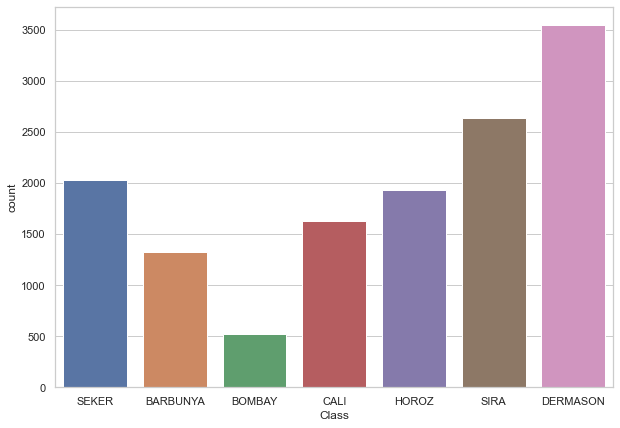

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(x= 'Class', data= df)
plt.show()

## Colomns with Nulls

<AxesSubplot:>

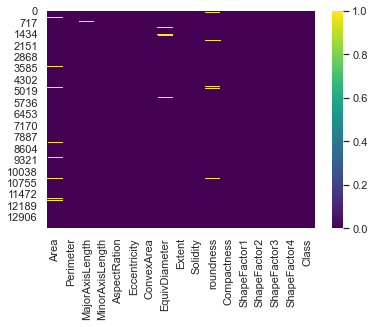

In [49]:
sns.heatmap(df.isnull(),cmap='viridis')


## Correlation

<AxesSubplot:>

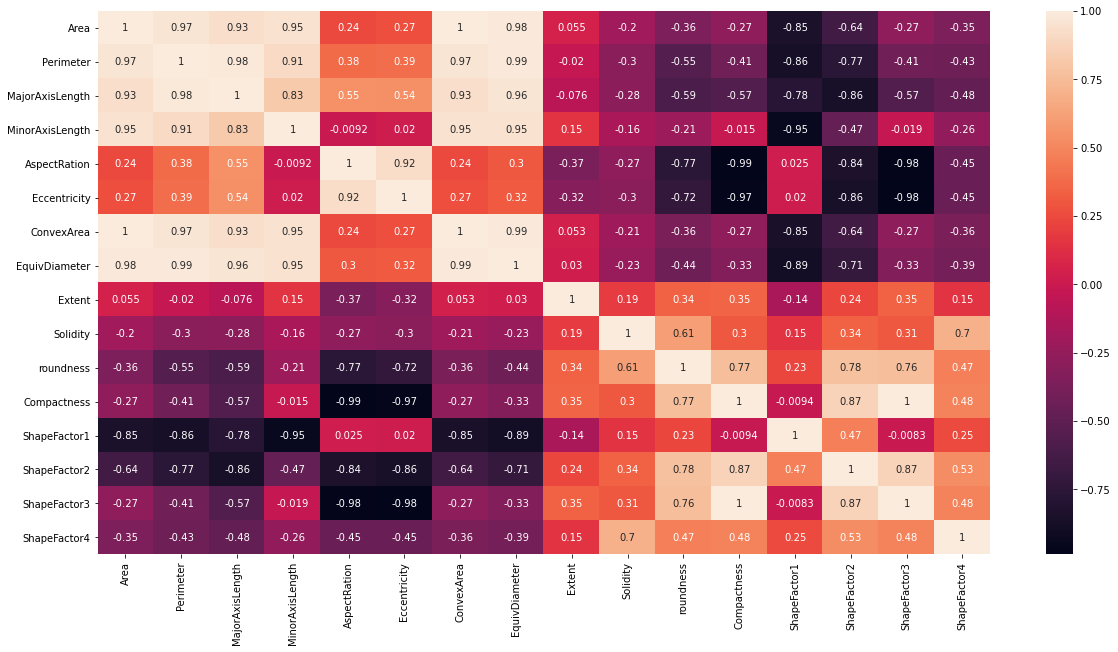

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### Relationship of Major Axis Length and Minor Axis Length is nothing but Aspect Ratio

<AxesSubplot:xlabel='MinorAxisLength', ylabel='MajorAxisLength'>

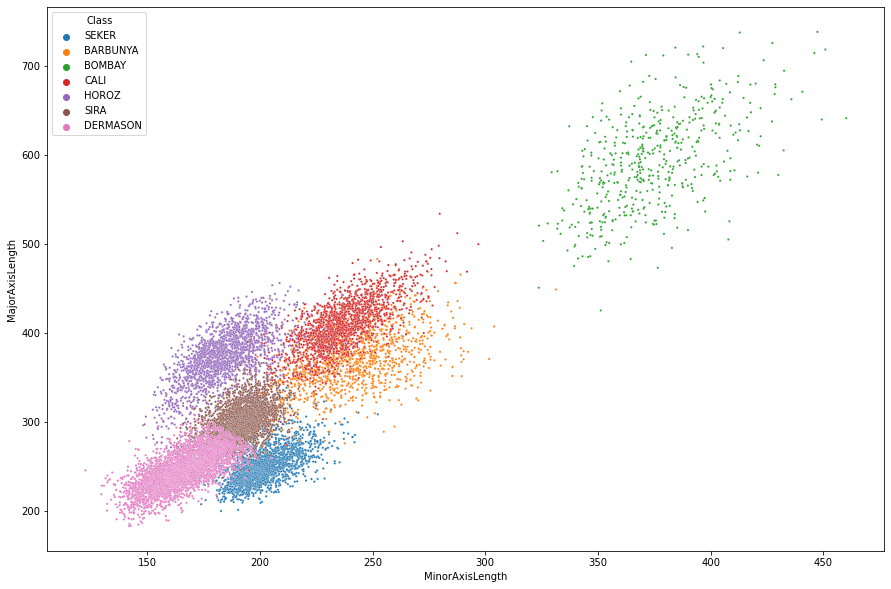

In [6]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x="MinorAxisLength", y="MajorAxisLength", s=5, hue="Class", data=df)

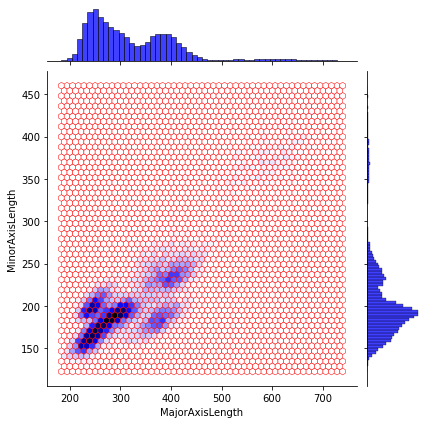

In [7]:
sns.jointplot(x='MajorAxisLength',y='MinorAxisLength',data=df,kind='hex',color = 'b',dropna = True, edgecolor="r", linewidth=0.5)

### Relationship of Ed and A

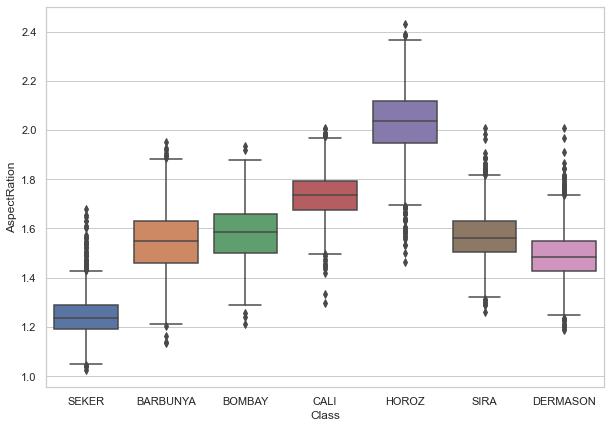

In [8]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.boxplot(x="Class",y="AspectRation", data=df)
plt.show()

<AxesSubplot:xlabel='Area', ylabel='EquivDiameter'>

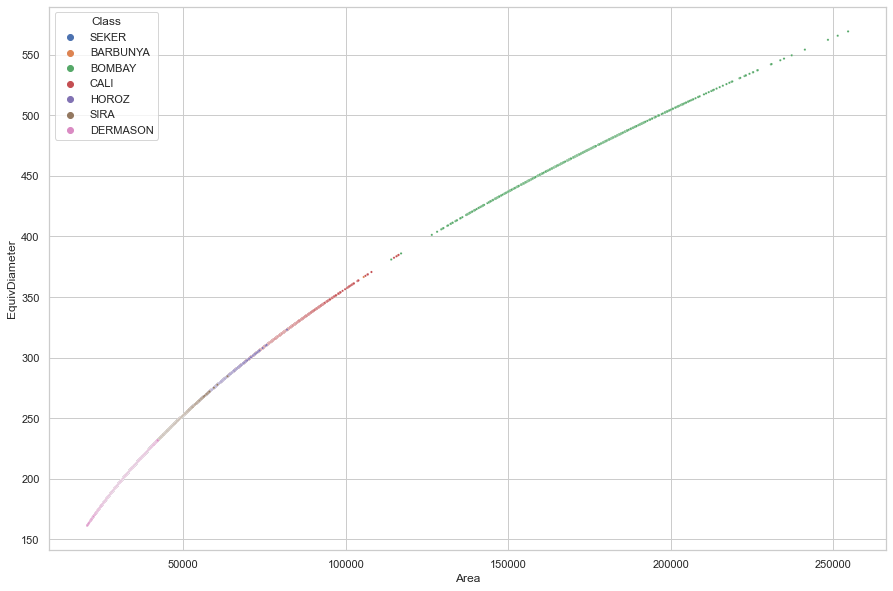

In [9]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x="Area", y="EquivDiameter", s=5, hue="Class", data=df)

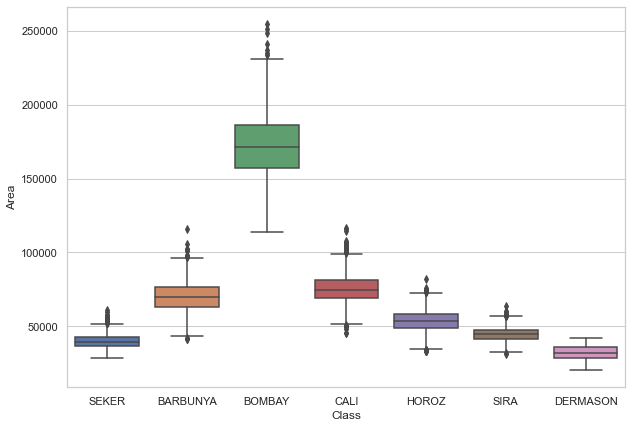

In [10]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.boxplot(x="Class",y="Area", data=df)
plt.show()

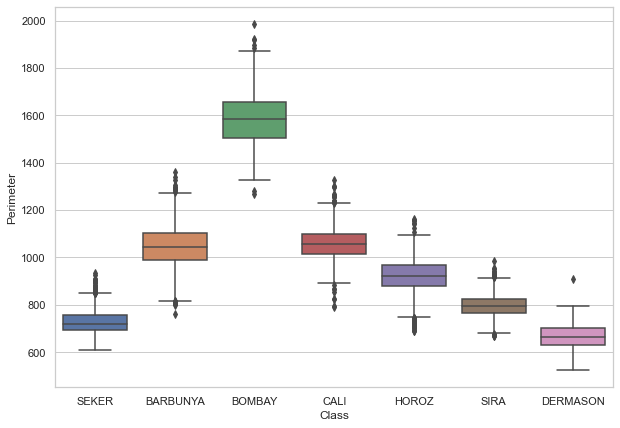

In [11]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.boxplot(x="Class",y="Perimeter", data=df)
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Area'>

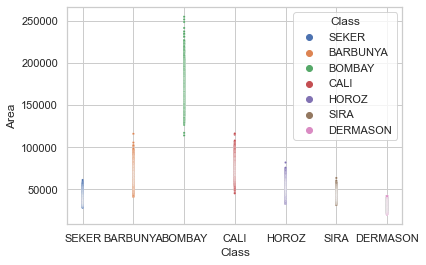

In [12]:
sns.scatterplot(x="Class", y="Area", s=5, hue="Class", data=df)

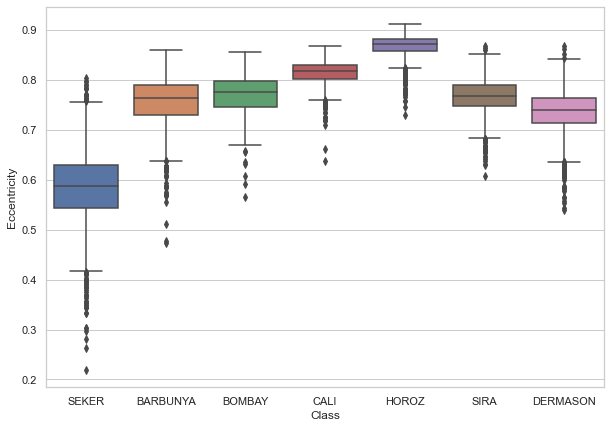

In [13]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.boxplot(x="Class",y="Eccentricity", data=df)
plt.show()

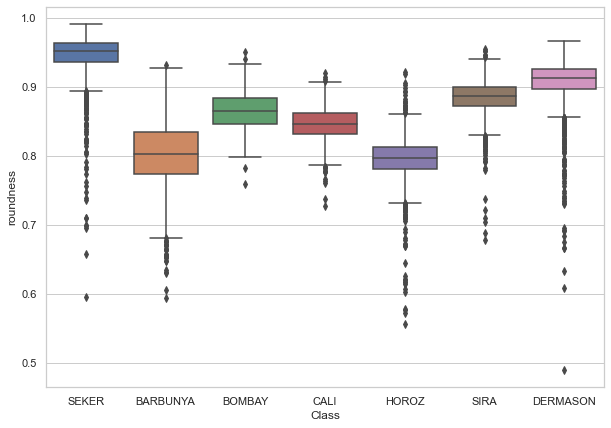

In [14]:
plt.figure(figsize=(10,7))
sns.set(style='whitegrid')
sns.boxplot(x="Class",y="roundness", data=df)
plt.show()

<AxesSubplot:xlabel='Perimeter', ylabel='Eccentricity'>

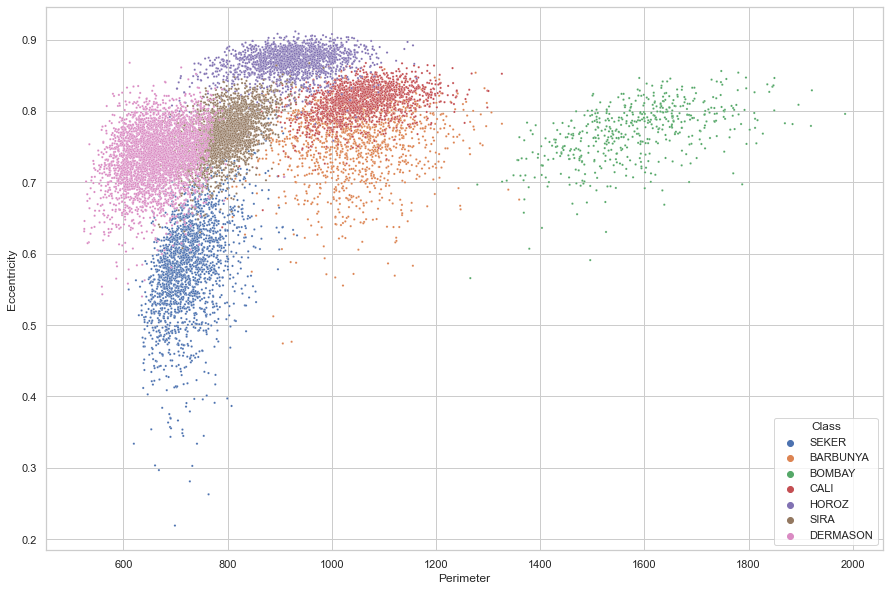

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x="Perimeter", y="Eccentricity", s=5, hue="Class", data=df)

<AxesSubplot:xlabel='roundness', ylabel='Eccentricity'>

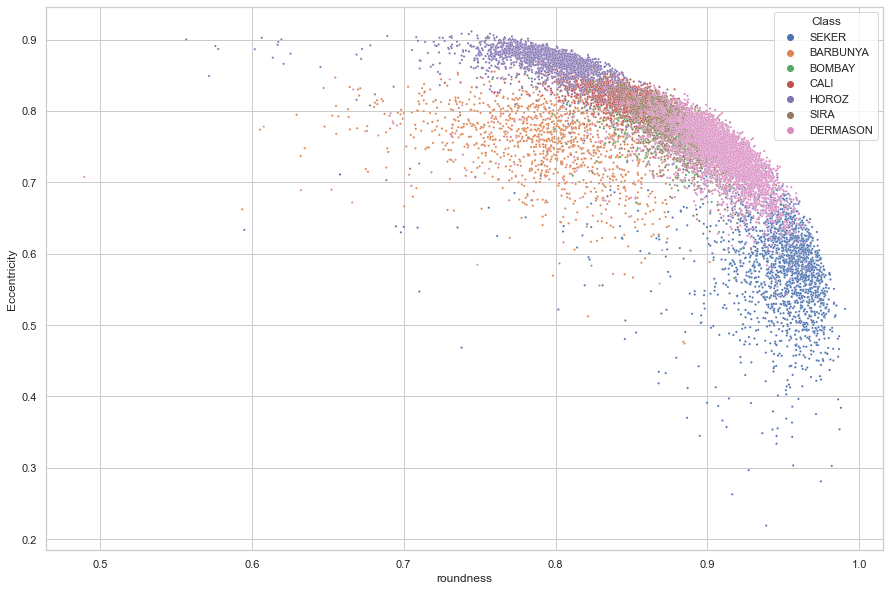

In [16]:
f, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x="roundness", y="Eccentricity", s=5, hue="Class", data=df)

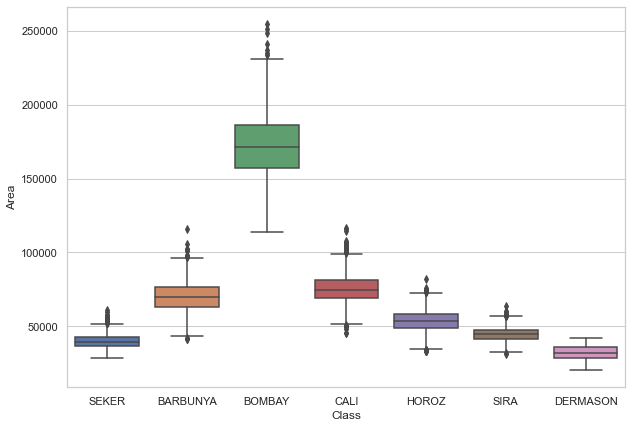

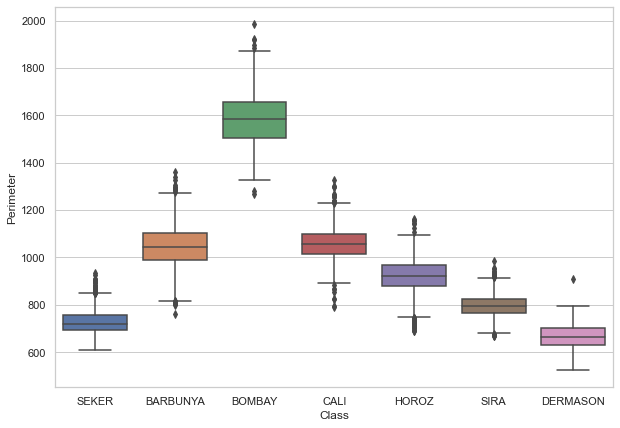

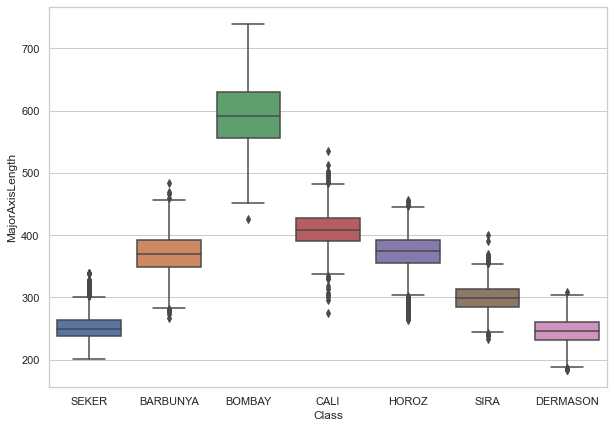

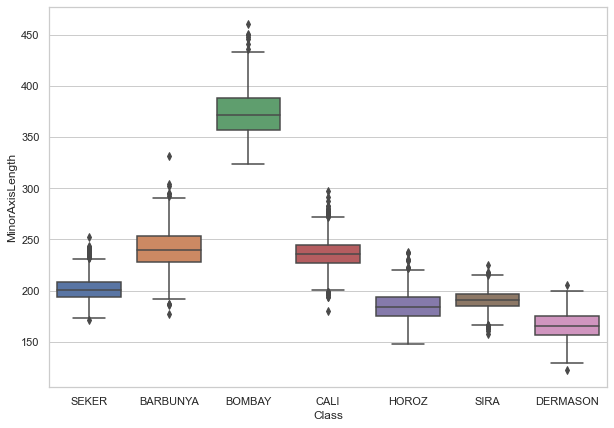

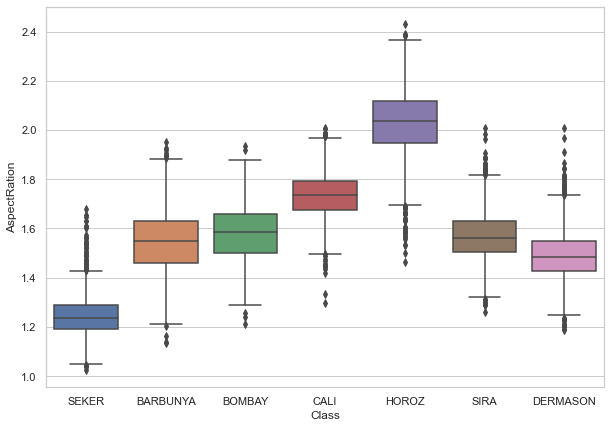

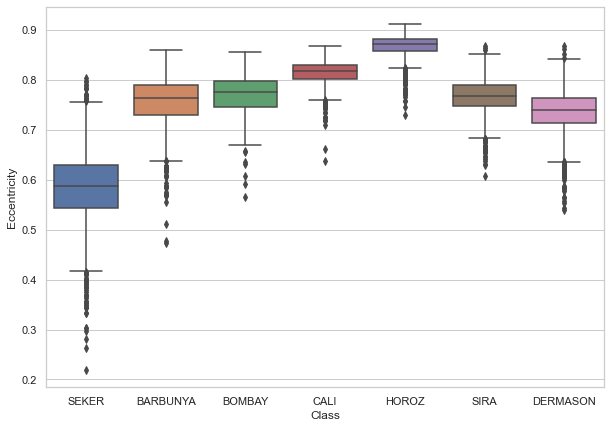

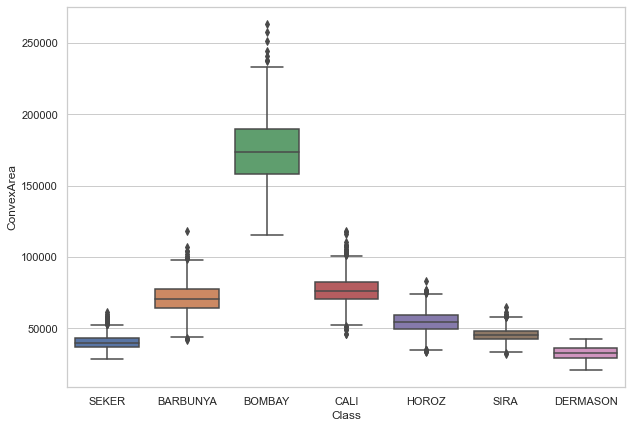

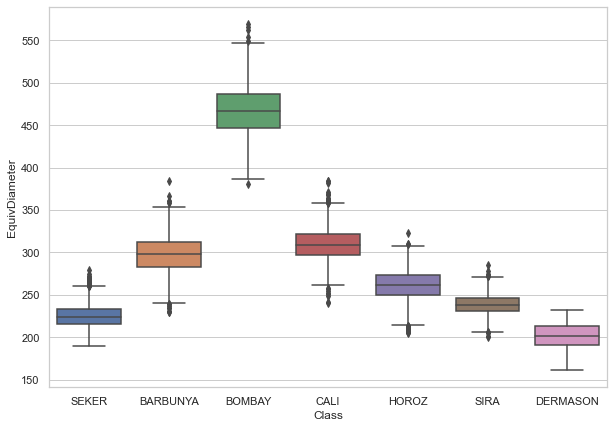

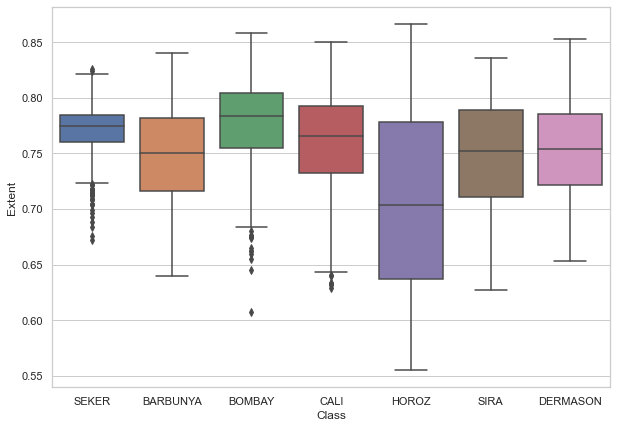

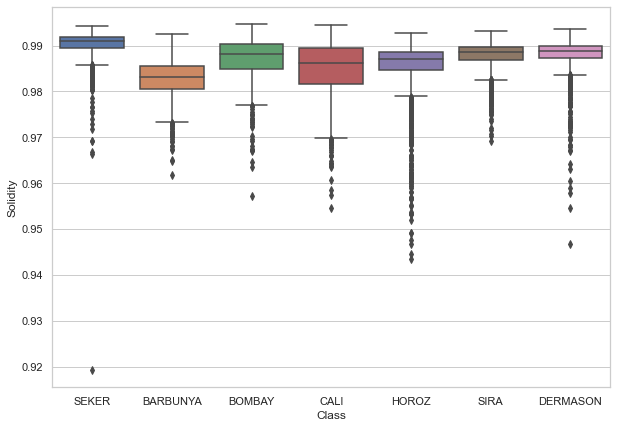

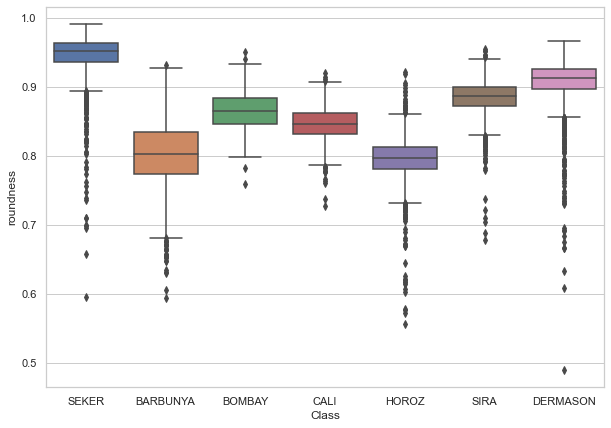

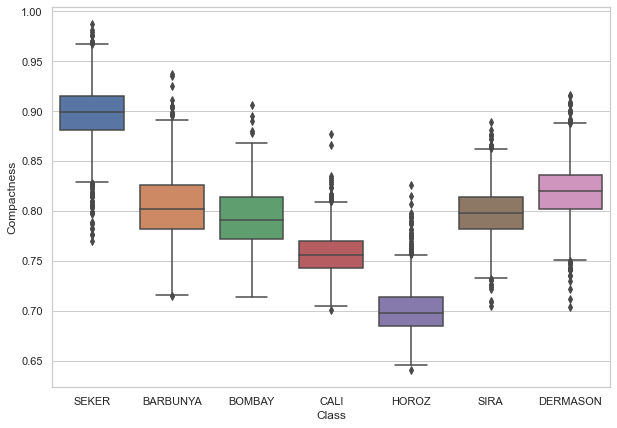

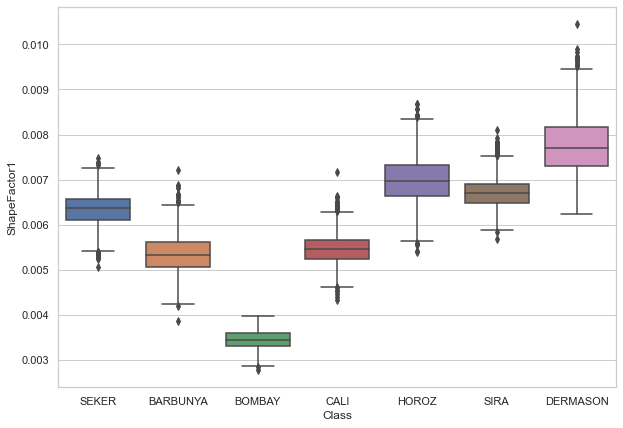

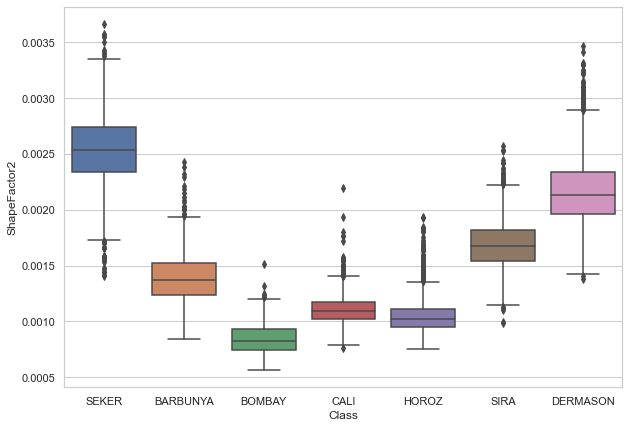

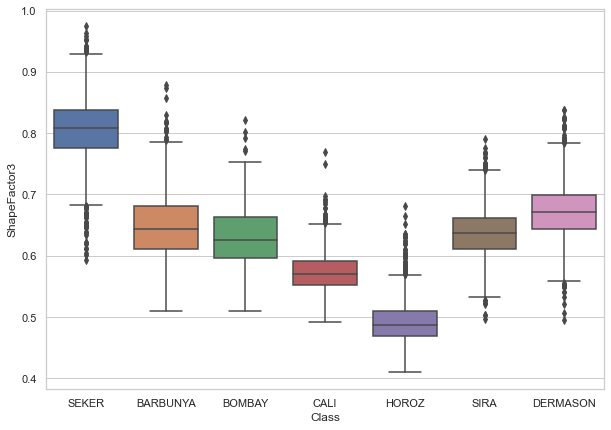

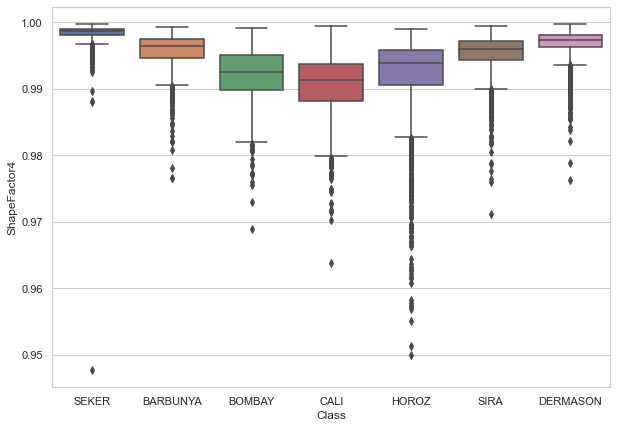

In [17]:
for colomn in df.drop('Class', axis=1):
        plt.figure(figsize=(10,7))
        sns.set(style='whitegrid')
        sns.boxplot(x="Class",y= colomn, data=df)
        plt.show()

# Pre processing

In [18]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df[['Class']])

C:\Users\NICK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [19]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,NaN,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [20]:
df['Class'].head()

0    5
1    5
2    5
3    5
4    5
Name: Class, dtype: int32

## find the encoded vales

In [21]:
imputer = SimpleImputer(strategy="median")

In [22]:
imputer.fit(df)

SimpleImputer(strategy='median')

In [23]:
X = imputer.transform(df)

In [24]:
df = pd.DataFrame(X, columns=df.columns, index=df.index)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5.0
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5.0
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5.0
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5.0
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.883110,0.970516,0.006697,0.003665,0.941900,0.999166,5.0


### Checking if all nulls eliminated

<AxesSubplot:>

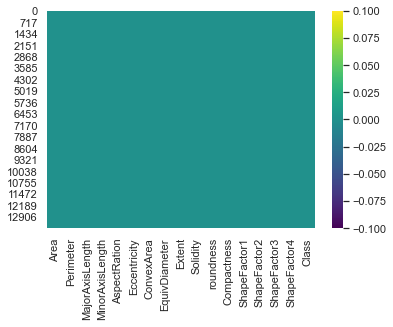

In [25]:
sns.heatmap(df.isnull(),cmap='viridis')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  float64
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  float64
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  float64
dtypes: float64(1

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53021.693593,29146.423444,20420.000000,36590.000000,44732.500000,61092.500000,254616.000000
Perimeter,13611.0,854.833760,213.969372,524.736000,703.859000,794.885000,975.129000,1985.370000
MajorAxisLength,13611.0,320.306913,85.234799,183.601165,253.929837,297.864031,376.028246,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,252.766748,58.785120,161.243764,215.374154,238.395303,278.397691,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


# Train the Model

## Training and testing split

### Considering all attributes

In [28]:
#Training and testing split
from sklearn.model_selection import train_test_split
df = df.sample(frac = 1)
x = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

#### Training with Decision tree

In [29]:
#Training model(Decision tree)
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

##### Prediction of Decision tree

In [30]:
pred_dtree = d_tree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       396
         1.0       1.00      1.00      1.00       168
         2.0       0.91      0.92      0.92       486
         3.0       0.89      0.90      0.89      1038
         4.0       0.94      0.90      0.92       549
         5.0       0.93      0.92      0.92       621
         6.0       0.85      0.85      0.85       826

    accuracy                           0.90      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.90      0.90      0.90      4084



In [31]:
print(accuracy_score(y_test, pred_dtree))

0.8996082272282077


#### random forest training

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

##### Prediction of Random Forest

In [33]:
pred_rf = rfc.predict(X_test)
print(classification_report(y_test, pred_rf))
print(accuracy_score(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92       396
         1.0       1.00      1.00      1.00       168
         2.0       0.92      0.93      0.93       486
         3.0       0.92      0.95      0.93      1038
         4.0       0.95      0.93      0.94       549
         5.0       0.96      0.96      0.96       621
         6.0       0.90      0.89      0.89       826

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

0.9311949069539667


#### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\NICK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Prediction of Logistic Regression

In [35]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
from sklearn import metrics

print(metrics.r2_score(y_test, predictions))

print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.02      0.04       396
         1.0       0.97      1.00      0.99       168
         2.0       0.53      0.75      0.62       486
         3.0       0.62      0.88      0.73      1038
         4.0       0.45      0.45      0.45       549
         5.0       0.35      0.15      0.21       621
         6.0       0.52      0.57      0.55       826

    accuracy                           0.56      4084
   macro avg       0.59      0.55      0.51      4084
weighted avg       0.55      0.56      0.50      4084

[[  8   2 292   0  78   6  10]
 [  0 168   0   0   0   0   0]
 [  0   3 363   0  14  86  20]
 [  0   0   0 916  47   0  75]
 [  1   0  26  25 246  20 231]
 [  2   0   0 399  24  93 103]
 [  0   0   0 148 140  64 474]]
0.30980158635010635
0.555337904015671


### Dropping ShapeFactor3

In [36]:
#Training and testing split
from sklearn.model_selection import train_test_split
df = df.sample(frac = 1)
x = df.drop(['Class', 'ShapeFactor3'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

#### Training with Decision tree

In [37]:
#Training model(Decision tree)
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

##### Prediction of Decision tree

In [38]:
pred_dtree = d_tree.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, pred_dtree))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       380
         1.0       1.00      0.99      0.99       152
         2.0       0.91      0.89      0.90       461
         3.0       0.90      0.88      0.89      1109
         4.0       0.93      0.94      0.93       602
         5.0       0.91      0.93      0.92       579
         6.0       0.82      0.83      0.82       801

    accuracy                           0.89      4084
   macro avg       0.91      0.91      0.91      4084
weighted avg       0.89      0.89      0.89      4084



In [39]:
print(accuracy_score(y_test, pred_dtree))

0.8920176297747306


#### random forest training

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

##### Prediction of Random Forest

In [41]:
pred_rf = rfc.predict(X_test)
print(classification_report(y_test, pred_rf))
print(accuracy_score(y_test, pred_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       380
         1.0       1.00      0.99      1.00       152
         2.0       0.94      0.92      0.93       461
         3.0       0.90      0.93      0.91      1109
         4.0       0.96      0.95      0.95       602
         5.0       0.94      0.94      0.94       579
         6.0       0.88      0.86      0.87       801

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084

0.9196865817825661


#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\NICK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Prediction of Logistic Regression

In [43]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
from sklearn import metrics

print(metrics.r2_score(y_test, predictions))

print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.38      0.11      0.17       380
         1.0       0.94      0.98      0.96       152
         2.0       0.54      0.73      0.62       461
         3.0       0.62      0.89      0.73      1109
         4.0       0.47      0.38      0.42       602
         5.0       0.37      0.14      0.21       579
         6.0       0.49      0.53      0.51       801

    accuracy                           0.55      4084
   macro avg       0.54      0.54      0.52      4084
weighted avg       0.52      0.55      0.51      4084

[[ 40   2 272   0  59   4   3]
 [  0 149   3   0   0   0   0]
 [ 22   7 336   0   6  65  25]
 [  0   0   0 992  46   0  71]
 [ 33   0  12  40 231  29 257]
 [  1   0   0 385  21  83  89]
 [  8   0   1 196 128  44 424]]
0.25147236339777246
0.5521547502448579
